In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def true_fnc(x):
    return np.sin(2*np.pi*x)

In [3]:
np.random.seed(0) #similar to random_state=42

In [4]:
num_samples=100
noise=0.1
X=np.sort(np.random.rand(num_samples))
y=true_fnc(X)+np.random.randn(num_samples)*noise

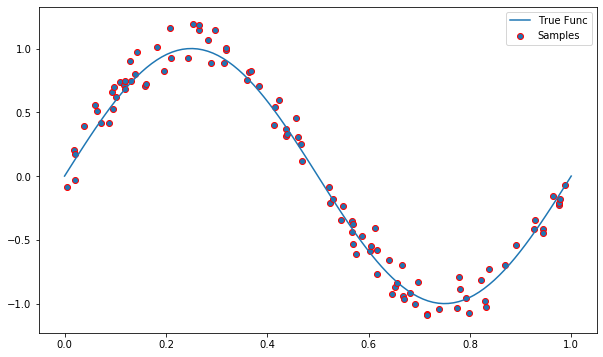

In [5]:
plt.figure(figsize=(10,6))
X_range=np.linspace(0,1,100)
plt.plot(X_range,true_fnc(X_range),label='True Func')
plt.scatter(X,y,label='Samples',edgecolor='r')
plt.legend(loc='best')
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [7]:
import pandas as pd

In [8]:
pd.DataFrame(PolynomialFeatures(degree=10).fit_transform(X[:,np.newaxis]));

In [9]:
model=make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
model.fit(X[:,np.newaxis],y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [10]:
X[:,np.newaxis]

array([[0.00469548],
       [0.0187898 ],
       [0.02010755],
       [0.0202184 ],
       [0.03918779],
       [0.06022547],
       [0.0641475 ],
       [0.07103606],
       [0.0871293 ],
       [0.09394051],
       [0.09609841],
       [0.09710128],
       [0.10204481],
       [0.11037514],
       [0.11827443],
       [0.11872772],
       [0.12019656],
       [0.1289263 ],
       [0.13179786],
       [0.13818295],
       [0.14335329],
       [0.15896958],
       [0.16130952],
       [0.18319136],
       [0.19658236],
       [0.20887676],
       [0.21038256],
       [0.24442559],
       [0.2532916 ],
       [0.26455561],
       [0.26538949],
       [0.28280696],
       [0.28940609],
       [0.2961402 ],
       [0.31542835],
       [0.31798318],
       [0.31856895],
       [0.3595079 ],
       [0.36371077],
       [0.36872517],
       [0.38344152],
       [0.41426299],
       [0.41466194],
       [0.4236548 ],
       [0.43703195],
       [0.43758721],
       [0.43860151],
       [0.456

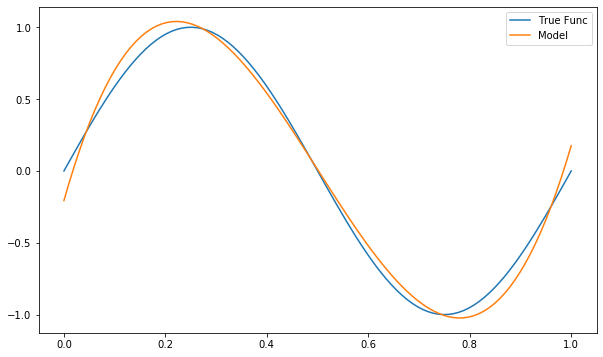

In [11]:
plt.figure(figsize=(10,6))
plt.plot(X_range,true_fnc(X_range),label='True Func')
plt.plot(X_range,model.predict(X_range[:,np.newaxis]),label='Model')
plt.legend(loc='best')
#plt.ylim((-2,2))
plt.show()

In [12]:
model.score(X[:,np.newaxis],y)

0.9722034602638632

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X.reshape(100,1),y,test_size=0.2)

In [15]:
model.fit(X_train,y_train)
print('Model performance on training set:',model.score(X_train,y_train))
print('Model performance on testing set:',model.score(X_test,y_test))

Model performance on training set: 0.9716149354101252
Model performance on testing set: 0.9708356412787511


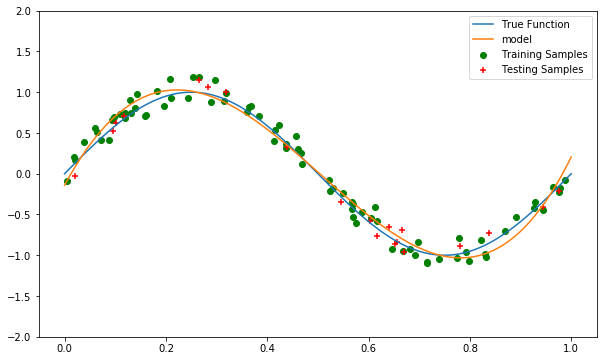

In [16]:
plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fnc(X_range), label="True Function")
plt.plot(X_range, model.predict(X_range[:, np.newaxis]), label="model")
plt.scatter(X_train, y_train, label="Training Samples", color='g')
plt.scatter(X_test, y_test, label="Testing Samples", color='r', marker="+")
plt.legend(loc="best")
plt.ylim((-2, 2))
plt.show()

# Guided Project

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

C:\Users\eldiy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
df=pd.read_csv('D:\Documents\GitHub\data-labs-oct\module-2\lab-intro-to-scipy\ks-projects-201801.csv')

In [19]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [20]:
df[(df.usd_pledged_real>df['usd pledged'])&(df.currency=='USD')].sample(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
80493,1409276726,Kalia Vandever Quartet Tour in New Orleans,Jazz,Music,USD,2017-05-26,1500.0,2017-04-26 03:45:36,2266.99,successful,34,US,1332.99,2266.99,1500.0
332381,763175991,Music of Aaron Jay Myers recorded by Chamber C...,Classical Music,Music,USD,2017-09-11,5000.0,2017-08-13 03:10:33,5115.00,successful,61,US,228.00,5115.00,5000.0
104956,1533415859,Battleship Beer Pong PRO™: Become a legendary ...,Live Games,Games,USD,2017-10-11,15000.0,2017-09-11 17:55:44,6882.00,failed,94,US,2872.00,6882.00,15000.0
91610,1465459910,Know: what defines you?,Farms,Food,USD,2017-11-26,30000.0,2017-11-05 14:42:21,282.00,failed,7,US,108.00,282.00,30000.0
165140,1840418726,Nearby - a sharing economy app for your stuff,Apps,Technology,USD,2017-07-15,10000.0,2017-06-26 16:59:13,2093.00,canceled,74,US,152.00,2093.00,10000.0
341404,808932914,HUMAN,Photobooks,Photography,USD,2017-08-01,16500.0,2017-06-29 16:54:21,1903.00,failed,30,US,0.00,1903.00,16500.0
216946,2105102562,templateNest - Templates to make a website in ...,Web,Technology,USD,2017-04-13,1000.0,2017-03-30 18:04:12,661.00,failed,31,US,109.00,661.00,1000.0
40626,1206728510,"""Memory""",Science Fiction,Film & Video,USD,2017-06-19,1000.0,2017-05-17 12:35:53,50.00,failed,1,US,0.00,50.00,1000.0
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.00,failed,4,US,0.00,154.00,6500.0
262056,40295589,Vonn Sketchbook 2,Art,Art,USD,2017-02-25,5000.0,2017-01-25 21:04:00,11382.00,successful,197,US,5311.00,11382.00,5000.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# Goal of the study - will I fail my project?

# Columns that are allowed to use:
1. Name
2. Category
3. Main Category
4. Currency
5. Difference between launched and deadline
6. Goal
7. Launched
8. STATE
9. Country
10. usd_goal_real

1st approach remove usd_goal_real

2nd approach remove currency and goal

# Data preparation

In [22]:
df.describe().applymap(round)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661,378661,378661,378661,374864,378661,378661
mean,1074731192,49081,9683,106,7037,9059,45454
std,619086204,1183391,95636,907,78640,90973,1152950
min,5971,0,0,0,0,0,0
25%,538263516,2000,30,2,17,31,2000
50%,1075275634,5200,620,12,395,624,5500
75%,1610148624,16000,4076,56,3034,4050,15500
max,2147476221,100000000,20338986,219382,20338986,20338986,166361391


## THERE ARE OUTLIERS!
There is a extremely enthusiastic project 0.1B. But if we consider the USD converted goal, the outlier is even higher. From this table we can see the max value of pledged in USD and since it is smaller than max goal, we are sure that the project has failed.

At the same time we can see that most of the projects (more than 75% of the database) are much more realistic. 75% of the database has the value of usd_goal_real smaller than 16k. 

Moreover we can see that there are projects that were never financed and there are projects that didnt ask for money. 

The median number of backers is 12. Which is much smaller than the maximum - 219k. Yeah, some projects are really successful.

In [23]:
df.state.value_counts(normalize=True)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

In [24]:
df1=df.loc[df.state.isin(['failed','successful'])].copy()

In [25]:
df1.state.value_counts(normalize=True)

failed        0.596123
successful    0.403877
Name: state, dtype: float64

In [26]:
df1.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [27]:
crosstab_df=pd.crosstab(df1.main_category,df1.state, normalize='index').round(1)

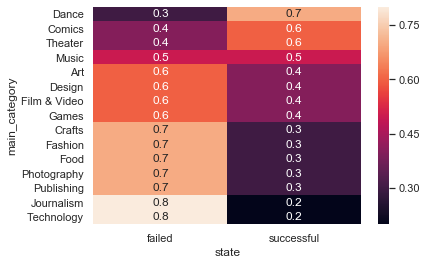

In [28]:
sns.heatmap(crosstab_df.sort_values(by='successful',ascending=False), annot=True)

In [29]:
df1.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [30]:
crosstab_currency=pd.crosstab(df1.currency,df1.state)
crosstab_currency['success_rate']=(crosstab_currency.successful/crosstab_currency.sum(axis=1)).round(2)
crosstab_currency.sort_values(by='success_rate', ascending=False)

state,failed,successful,success_rate
currency,,,
HKD,261,216,0.45
USD,152132,109379,0.42
GBP,17395,12081,0.41
DKK,567,362,0.39
SGD,276,178,0.39
NZD,826,448,0.35
SEK,1001,509,0.34
CAD,8238,4137,0.33
AUD,4610,2011,0.30


In [31]:
df1.launched=pd.to_datetime(df1.launched)

In [32]:
df1.deadline=pd.to_datetime(df1.deadline)

In [33]:
df1['duration']=(df1.deadline-df1.launched).dt.days

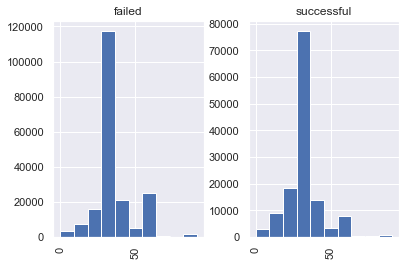

In [34]:
df1.duration.hist(by=df1.state);

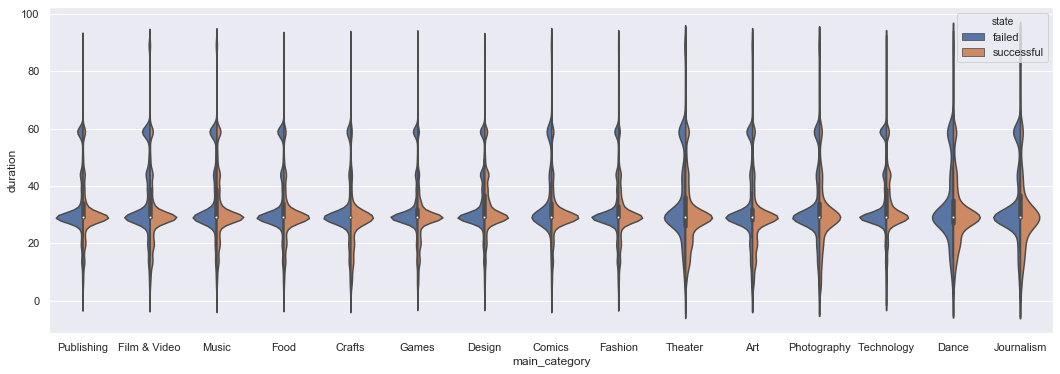

In [35]:
plt.figure(figsize=(18,6))
sns.violinplot(x='main_category',y='duration',hue='state',data=df1,split=True)
plt.show()

In [36]:
df1.usd_goal_real.max()

166361390.71

In [37]:
df1.loc[df1.usd_goal_real.idxmax()]

ID                                                 1243678698
name                FUCK Potato Salad. Paleo Potato Brownies!
category                                                 Food
main_category                                            Food
currency                                                  GBP
deadline                                  2014-08-08 00:00:00
goal                                                  9.9e+07
launched                                  2014-07-09 00:24:34
pledged                                                     0
state                                                  failed
backers                                                     0
country                                                    GB
usd pledged                                                 0
usd_pledged_real                                            0
usd_goal_real                                     1.66361e+08
duration                                                   29
Name: 47

In [38]:
df1.query('usd_goal_real>1e+6 & state=="successful"')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
89481,1454565733,Bring Back MYSTERY SCIENCE THEATER 3000,Television,Film & Video,USD,2015-12-12,2000000.0,2015-11-10 16:49:32,5764229.38,successful,48270,US,5764229.38,5764229.38,2000000.00,31
111636,1567218706,The Newest Hottest Spike Lee Joint,Narrative Film,Film & Video,USD,2013-08-21,1250000.0,2013-07-22 18:15:41,1418910.22,successful,6421,US,1418910.22,1418910.22,1250000.00,29
134462,1682353635,Camelot Unchained,Video Games,Games,USD,2013-05-02,2000000.0,2013-04-02 17:56:11,2232933.03,successful,14873,US,2232933.03,2232933.03,2000000.00,29
141638,1719494931,Obduction,Video Games,Games,USD,2013-11-16,1100000.0,2013-10-17 15:06:31,1321306.44,successful,22195,US,1321306.44,1321306.44,1100000.00,29
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.00,30
171322,1871494789,WISH I WAS HERE,Narrative Film,Film & Video,USD,2013-05-24,2000000.0,2013-04-24 11:57:04,3105473.10,successful,46520,US,3105473.10,3105473.10,2000000.00,29
272924,458565935,Project Eternity,Video Games,Games,USD,2012-10-17,1100000.0,2012-09-14 19:01:04,3986929.49,successful,73986,US,3986929.49,3986929.49,1100000.00,32
324291,721748605,Blue Mountain State: The Movie,Narrative Film,Film & Video,USD,2014-05-15,1500000.0,2014-04-15 14:43:13,1911827.41,successful,23999,US,1911827.41,1911827.41,1500000.00,29
337372,788486889,The Bards Tale IV,Video Games,Games,USD,2015-07-11,1250000.0,2015-06-02 14:57:26,1519680.86,successful,33741,US,1519680.86,1519680.86,1250000.00,38
355330,880009511,Elite: Dangerous,Video Games,Games,GBP,2013-01-05,1250000.0,2012-11-06 01:00:57,1578316.08,successful,25681,GB,2529437.82,2545014.32,2015608.88,59


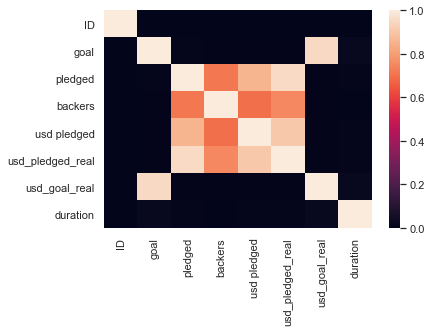

In [39]:
sns.heatmap(df1.corr())

In [40]:
df1.isna().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
duration              0
dtype: int64

In [41]:
df1.drop('usd pledged',axis=1,inplace=True)

In [42]:
df1.country.value_counts()

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

In [43]:
dct={'US':'US','CA':'CA','GB':'EU','DE':'EU','FR':'EU','NL':"EU",'IT':'EU','ES':"EU",'SE':'EU','DK':"EU",
    'NO':'EU','LU':'EU','CH':'EU'}

In [44]:
df1.country=df1.country.map(dct).fillna('Other')

In [45]:
df1.country.value_counts()

US       261360
EU        45789
CA        12370
Other     12156
Name: country, dtype: int64

In [119]:
X=df1[['main_category','country','currency','duration','usd_goal_real', 'launched']].copy()
y=df1.state.copy()

In [120]:
#['year']=X.launched.dt.year
X['month']=X.launched.dt.month
X['weekday']=X.launched.dt.weekday

In [121]:
dummies=['main_category','country','currency','month','weekday']

In [122]:
X.drop('launched',axis=1,inplace=True)

In [123]:
X=pd.get_dummies(data=X,columns=dummies,drop_first=True)

In [124]:
y=y.map({'failed':1,'successful':0})

In [125]:
y.value_counts()

1    197719
0    133956
Name: state, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X.usd_goal_real=(X.usd_goal_real-X.usd_goal_real.min())/(X.usd_goal_real.max()-X.usd_goal_real.min())

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
X.duration=X.duration/29

In [130]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.33, stratify=y)

In [131]:
y.value_counts(normalize=True)

1    0.596123
0    0.403877
Name: state, dtype: float64

In [59]:
y_test.value_counts(normalize=True)

1    0.596119
0    0.403881
Name: state, dtype: float64

In [60]:
y_train.value_counts(normalize=True)

1    0.596125
0    0.403875
Name: state, dtype: float64

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model1=LogisticRegression().fit(X_train,y_train)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
y_pred1=model1.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y_test,y_pred1)

array([[13925, 30281],
       [ 9759, 55488]], dtype=int64)

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

0.582716196586604


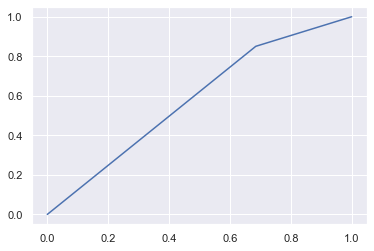

In [67]:
fpr,tpr,_=roc_curve(y_test,y_pred1)
auc=roc_auc_score(y_test,y_pred1)
plt.plot(fpr,tpr)
print(auc)

# Another model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [69]:
#!pip install xgboost

In [70]:
from xgboost import XGBClassifier

In [71]:
#!pip install catboost

In [72]:
from catboost import CatBoostClassifier

In [132]:
model_list=[KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier]

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
l_acc=[]
l_cm=[]

for model in model_list:
    print(type(model).__name__, 'started')

KNeighborsClassifier started
GaussianNB started
DecisionTreeClassifier started
RandomForestClassifier started
XGBClassifier started
CatBoostClassifier started


In [134]:
for model in model_list:
    print(model, 'started')
    model2=model().fit(X=X_train,y=y_train)
    y_pred2=model2.predict(X_test)
    l_acc.append(accuracy_score(y_test,y_pred2))
    l_cm.append(confusion_matrix(y_test,y_pred2))
    print(model, 'is done')

<class 'sklearn.neighbors.classification.KNeighborsClassifier'> started
<class 'sklearn.neighbors.classification.KNeighborsClassifier'> is done
<class 'sklearn.naive_bayes.GaussianNB'> started
<class 'sklearn.naive_bayes.GaussianNB'> is done
<class 'sklearn.tree.tree.DecisionTreeClassifier'> started
<class 'sklearn.tree.tree.DecisionTreeClassifier'> is done
<class 'sklearn.ensemble.forest.RandomForestClassifier'> started


C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.ensemble.forest.RandomForestClassifier'> is done
<class 'xgboost.sklearn.XGBClassifier'> started
<class 'xgboost.sklearn.XGBClassifier'> is done


In [ ]:
pd.DataFrame([[type(i).__name__ for i in model_list],l_acc]).T.sort_values(by=1)

# Catboost

In [98]:
?CatBoostClassifier

In [115]:
# Initialize data
cat_features = dummies

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                          eval_metric='F1')
# Fit model
model.fit(X_train, y_train, cat_features)
# Get predicted classes
preds_class = model.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.3498362	total: 85.5ms	remaining: 8.46s
1:	learn: 0.4254489	total: 153ms	remaining: 7.47s
2:	learn: 0.4870701	total: 229ms	remaining: 7.41s
3:	learn: 0.5061436	total: 283ms	remaining: 6.79s
4:	learn: 0.5156065	total: 387ms	remaining: 7.36s
5:	learn: 0.5150058	total: 459ms	remaining: 7.18s
6:	learn: 0.5157533	total: 574ms	remaining: 7.63s
7:	learn: 0.5214274	total: 651ms	remaining: 7.48s
8:	learn: 0.5221624	total: 723ms	remaining: 7.31s
9:	learn: 0.5203685	total: 782ms	remaining: 7.04s
10:	learn: 0.5237262	total: 839ms	remaining: 6.79s
11:	learn: 0.5236503	total: 896ms	remaining: 6.57s
12:	learn: 0.5233228	total: 934ms	remaining: 6.25s
13:	learn: 0.5240970	total: 1.03s	remaining: 6.33s
14:	learn: 0.5238622	total: 1.09s	remaining: 6.17s
15:	learn: 0.5232752	total: 1.17s	remaining: 6.16s
16:	learn: 0.5233047	total: 1.24s	remaining: 6.06s
17:	learn: 0.5253221	total: 1.32s	remaining: 6s
18:	learn: 0.5272945	total: 1.39s	remaining: 5.91s
19:	learn: 0.52809

In [91]:
confusion_matrix(y_test,preds_class)

array([[48092, 17155],
       [22129, 22077]], dtype=int64)

In [93]:
confusion_matrix(y_test,preds_class)

array([[52080, 13167],
       [23003, 21203]], dtype=int64)

In [97]:
confusion_matrix(y_test,preds_class)

array([[52142, 13105],
       [23024, 21182]], dtype=int64)

In [116]:
y_test=y_test.map({'failed':1,'successful':0})
preds_class=pd.Series(preds_class).map({'failed':1,'successful':0})

0.6388683840346057


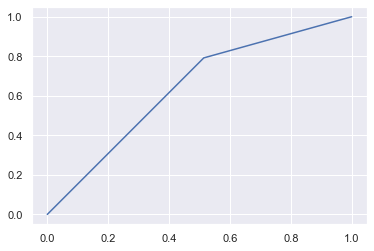

In [117]:
fpr,tpr,_=roc_curve(y_test,preds_class)
auc=roc_auc_score(y_test,preds_class)
plt.plot(fpr,tpr)
print(auc)